### Practical 13

### Diabetes Prediction Classifier. We have to develop an application to predict diabetes using theLogistic Regression Classifier.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression


Diabetes Prediction Classifier
We have to develop an application to predict diabetes using the Logistic Regression Classifier.


In [16]:
dataset = pd.read_csv("D:/ML Dataset/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


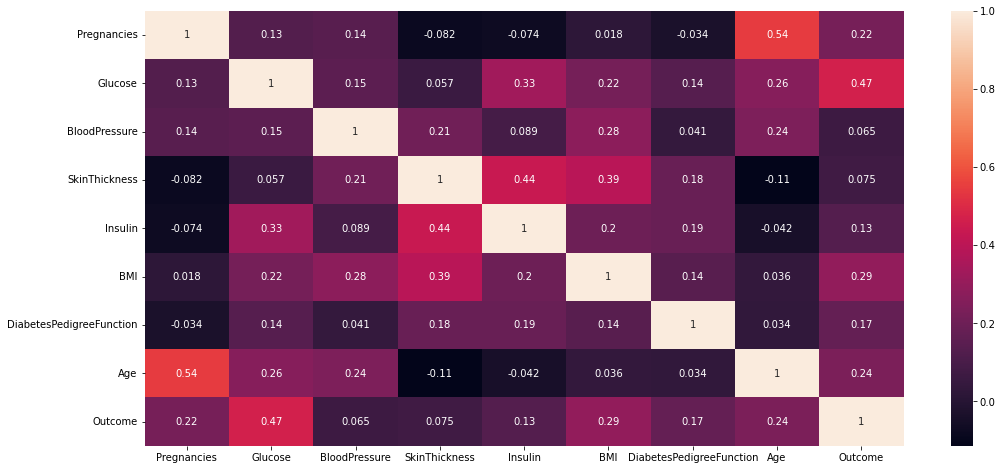

In [7]:
import seaborn as sn
fig = plt.figure(figsize=(17,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [18]:
x = dataset.iloc[:,0:7].values #independent variable

y = dataset.iloc[:,-1] #dependent variable


In [19]:
print(x)

[[  6.    148.     72.    ...   0.     33.6     0.627]
 [  1.     85.     66.    ...   0.     26.6     0.351]
 [  8.    183.     64.    ...   0.     23.3     0.672]
 ...
 [  5.    121.     72.    ... 112.     26.2     0.245]
 [  1.    126.     60.    ...   0.     30.1     0.349]
 [  1.     93.     70.    ...   0.     30.4     0.315]]


In [20]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [21]:
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)



In [23]:
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [24]:
y_pred = classifier.predict(xtest)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


In [25]:
import sklearn.metrics as metrics

print("Accuracy:", metrics.accuracy_score(ytest,y_pred)*100, "%")
print("Precision:", metrics.precision_score(ytest, y_pred)*100, "%")
print("Recall:", metrics.recall_score(ytest, y_pred)*100, "%")


Accuracy: 80.20833333333334 %
Precision: 74.0 %
Recall: 59.67741935483871 %
